SEE ALSO WIKIPAGE: https://exmediawiki.khm.de/exmediawiki/index.php/Word_embeddings

---

# Word Embeddings
## Training eines einfachen Word2Vec-Modells am eigenen Text
im Kern werden word2vec-Modellparameter als Matrizen (NumPy-Arrays) gespeichert. 

jedes Array ist ein vocabulary (gesteuert durch min_count Parameter) mal #size ( size - Parameter)

---
### Word2vec akzeptiert mehrere Parameter, die sowohl die Trainingsgeschwindigkeit als auch die Qualität beeinflussen.

Einer von ihnen ist für die Beschneidung des internen Dictionary. Wörter, die nur ein- bis zweimal in einem Milliarden-Wort-Korpus vorkommen, sind wahrscheinlich uninteressante Tippfehler und Müll. Darüber hinaus gibt es nicht genügend Daten, um ein sinnvolles Training für diese Wörter durchzuführen, also ist es am besten, sie zu ignorieren:

    model = Word2Vec(sentences, min_count=10) # default value for min_count is 5
    
Ein vernünftiger Wert für min_count liegt zwischen 0-100, abhängig von der Größe Ihres Datensatzes.

Beim Aufrufen von Word2Vec (min_count=1 oder Iter=1) werden zwei Durchläufe über den Satziterator ausgeführt 
- (oder im Allgemeinen Iter + 1 Durchläufe; Standard- Iter = 5 ). 
1. Der erste Durchgang sammelt Wörter und deren Häufigkeiten, um eine interne Wörterbuchbaumstruktur zu erstellen. 
2. Der zweite und die folgenden Durchgänge trainieren das neuronale Modell.

----
Ein weiterer Parameter ist die Größe der NN-Schichten, die den "Freiheitsgraden" des Trainingsalgorithmus entsprechen:

    model = Word2Vec(sentences, size=200) # default value is 100

Größere Sizevalues erfordern mehr Trainingsdaten, können aber zu besseren (genaueren) Modellen führen. Angemessene Werte liegen im Bereich von zehn bis hundert.

---
Der letzte der wichtigsten Parameter (vollständige Liste hier) ist für die **training parallelization**, um das Training zu beschleunigen:

    model = Word2Vec(sentences, workers=4) # default = 1 worker = no parallelization

Der Parameter workers hat nur dann Wirkung, wenn Sie Cython installiert haben. Ohne Cython können Sie aufgrund der GIL nur einen Kern verwenden (...das Training von word2vec wird sehr langsam sein). 

In [1]:
#text einlesen
f=open('./data/bostrom-harari.txt','r',errors = 'ignore')
raw=f.read()
raw = raw.lower()# converts to lowercase

# alternativ, wenn man das per hand zum testen machen mag... 
"""
sentences = [['this', 'is', 'a', 'sentence'],
			['yet', 'is', 'another', 'sentence'],
			['yet', 'one', 'another', 'sentence', 'for', 'my', 'test'],
			['and', 'yes', 'another', 'sentence'],
			['and', 'without', 'another', 'sentence'],
			['and', 'again', 'another', 'sentence'],
			['and', 'anyway', 'another', 'sentence'],
			['and', 'some', 'another', 'sentences'],
			['and', 'this', 'is' 'another', 'sentence', 'here']]
"""

"\nsentences = [['this', 'is', 'a', 'sentence'],\n\t\t\t['yet', 'is', 'another', 'sentence'],\n\t\t\t['yet', 'one', 'another', 'sentence', 'for', 'my', 'test'],\n\t\t\t['and', 'yes', 'another', 'sentence'],\n\t\t\t['and', 'without', 'another', 'sentence'],\n\t\t\t['and', 'again', 'another', 'sentence'],\n\t\t\t['and', 'anyway', 'another', 'sentence'],\n\t\t\t['and', 'some', 'another', 'sentences'],\n\t\t\t['and', 'this', 'is' 'another', 'sentence', 'here']]\n"

In [4]:
#tokenization
import nltk
nltk.download('punkt')

from nltk.tokenize import sent_tokenize
tokenized_text=sent_tokenize(raw)
#print(tokenized_text)

[nltk_data] Downloading package punkt to /home/whoami/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [5]:
# text speziell für word2vec-modell vorbereiten
texts = [[text for text in doc.split()] for doc in tokenized_text]
print(texts)

[['superintelligencesuperintelligence', 'paths,', 'dangers,', 'strategies', 'nick', 'bostrom', 'director,', 'future', 'of', 'humanity', 'institute', 'professor,', 'faculty', 'of', 'philosophy', '&', 'oxford', 'martin', 'school', 'university', 'of', 'oxfordgreat', 'clarendon', 'street,', 'oxford,', 'ox2', '6dp,', 'united', 'kingdom', 'oxford', 'university', 'press', 'is', 'a', 'department', 'of', 'the', 'university', 'of', 'oxford.'], ['it', 'furthers', 'the', 'university’s', 'objective', 'of', 'excellence', 'in', 'research,', 'scholarship,', 'and', 'education', 'by', 'publishing', 'worldwide.'], ['oxford', 'is', 'a', 'registered', 'trade', 'mark', 'of', 'oxford', 'university', 'press', 'in', 'the', 'uk', 'and', 'in', 'certain', 'other', 'countries', '©', 'nick', 'bostrom', '2014', 'the', 'moral', 'rights', 'of', 'the', 'author', 'have', 'been', 'asserted', 'first', 'edition', 'published', 'in', '2014', 'impression:', '1', 'all', 'rights', 'reserved.'], ['no', 'part', 'of', 'this', 'pub

In [6]:
#word2vec importieren
from gensim.models import Word2Vec

In [7]:
# eigenes word2vec-modell erstellen
model = Word2Vec(texts, min_count=1, size=100)

In [8]:
# print a summary of the model << NACHSEHEN GENAU!!!!
##vocab = anzahl der wörter
##size = layergröße (wieviele vektoren pro wort)
##alpha = vector of error gradients multiplied by the learning rate
print(model)

Word2Vec(vocab=35302, size=100, alpha=0.025)


gesamtes vocabulary inspizieren

In [9]:
# geammtes vokabular des textes anzeigen
## wv = ist ein numpy-vektor eines wortes (in unserem falle eindimensionalnumpy vector of a word
words = list(model.wv.vocab)
print(words)

['superintelligencesuperintelligence', 'paths,', 'dangers,', 'strategies', 'nick', 'bostrom', 'director,', 'future', 'of', 'humanity', 'institute', 'professor,', 'faculty', 'philosophy', '&', 'oxford', 'martin', 'school', 'university', 'oxfordgreat', 'clarendon', 'street,', 'oxford,', 'ox2', '6dp,', 'united', 'kingdom', 'press', 'is', 'a', 'department', 'the', 'oxford.', 'it', 'furthers', 'university’s', 'objective', 'excellence', 'in', 'research,', 'scholarship,', 'and', 'education', 'by', 'publishing', 'worldwide.', 'registered', 'trade', 'mark', 'uk', 'certain', 'other', 'countries', '©', '2014', 'moral', 'rights', 'author', 'have', 'been', 'asserted', 'first', 'edition', 'published', 'impression:', '1', 'all', 'reserved.', 'no', 'part', 'this', 'publication', 'may', 'be', 'reproduced,', 'stored', 'retrieval', 'system,', 'or', 'transmitted,', 'any', 'form', 'means,', 'without', 'prior', 'permission', 'writing', 'press,', 'as', 'expressly', 'permitted', 'law,', 'licence', 'under', 't

Vektoren für ein spezifisches Wort inspizieren
- wv steht für word-vectors

In [10]:
# vectoren für das wort 'artificial' (100)
print(model.wv['artificial'])

[-0.19253336  0.34903505 -0.12900008  0.48642102 -0.8189902   1.0116954
 -0.81247073 -0.44791448  0.5084443   1.1450063   0.03435281 -0.541228
  0.7214695  -1.3533667   0.93020564 -0.44790617  0.01008877  0.19440086
 -0.09966898 -0.40247664  1.4721805  -0.43534926 -0.18813208  1.4352461
 -0.5753273  -0.83712405 -0.77702737  0.5064114  -0.598898    0.17031422
 -0.5792274   0.9317772  -1.3367487  -0.25921327 -0.65831023 -0.37041336
 -0.02340504 -0.25951734 -0.14050113 -0.7447673  -0.5957447  -0.06817342
 -0.02619891 -1.2155942  -0.7564025  -1.1649004  -0.50963354  0.34529284
 -0.18456453  0.7766554   0.02675228  0.39135244  0.5922917  -0.46980247
  0.27724     0.16166267  0.58850455  0.2558551  -0.29940864 -0.18002345
  0.732476   -1.3462609   1.3568176  -0.3599366  -1.1738896   0.06375808
  0.9948451   0.00800639 -0.14591809 -0.42923826 -0.01041806  0.36826548
  0.58837026  0.38918328  0.24290146 -0.6577741  -1.0661107   0.96638405
  0.64956945 -0.17235988 -1.9711324   0.27528355  0.040

speichern und laden des modells...

In [11]:
model.wv.save_word2vec_format('mymodel.bin')
new_model = model.wv.load_word2vec_format('mymodel.bin')
print(new_model)


# oder so...
##funktioniert nur nicht in ubuntu:

#model.save('model.bin')
#new_model = Word2Vec.load('model.bin')



## Visualization

via PCA plot

/home/student/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """


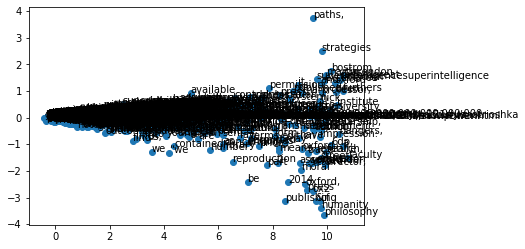

None

In [22]:
from sklearn.decomposition import PCA
from matplotlib import pyplot

#X ist eine liste aller vektoren
X = new_model.wv[new_model.wv.vocab]
# 2 dimensionen?
pca = PCA(n_components=2)
result = pca.fit_transform(X)
# create a scatter plot of the projection aus der ersten und der zweiten zeile
pyplot.scatter(result[:, 0], result[:, 1])
words = list(model.wv.vocab)
#für jeden entry in meinem vocab
for i, word in enumerate(words):
	pyplot.annotate(word, xy=(result[i,0], result[i,1]))
display(pyplot.show())
#dann kann man nun die nähen der einzelnen worte sehen:


In [20]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline

def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

/home/student/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/ipykernel_launcher.py:11: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # This is added back by InteractiveShellApp.init_path()


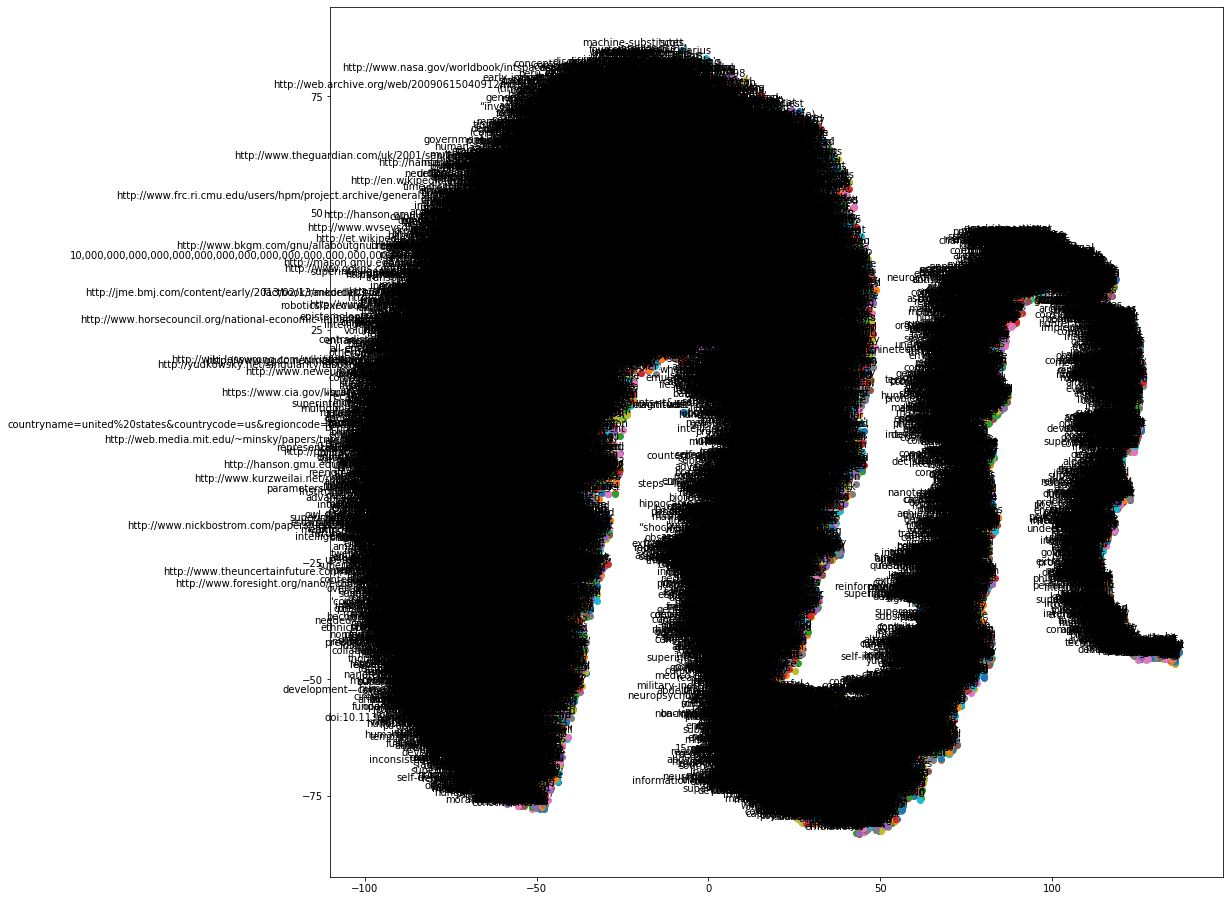

In [21]:
#tsne_plot(model)

## Evaluation 

via Word Analogy

In [12]:
# A to B is X to Y
# hierzu siehe auch CBOW und skip-gram
## Bedeutungen errechnen
## calculate: KÖNIG - MANN + FRAU = KÖNIGIN
word2vec_result1 = new_model.most_similar(positive=['intelligence', 'machine'], negative=['human'], topn=10)
# topn = wieviele ouputs sollen vorgeschlagen werden?
print("INTELLIGENCE - HUMAN + MACHINE = ", word2vec_result1, "\n")

INTELLIGENCE - HUMAN + MACHINE =  [('explosion', 0.9986820816993713), ('system', 0.9981156587600708), ('transition', 0.997809648513794), ('step', 0.9977526664733887), ('risk', 0.9977462291717529), ('function', 0.9976522922515869), ('program', 0.997626781463623), ('gain', 0.9976134896278381), ('form', 0.9975569844245911), ('human-level', 0.997550368309021)] 



In [21]:
word2vec_result2 = new_model.most_similar('artificial')
print("most nearest to artificial = ", word2vec_result2, "\n")

most nearest to artificial =  [('increases', 0.9994174838066101), ('each', 0.9994138479232788), ('minds', 0.9993829131126404), ('life', 0.9993769526481628), ('production', 0.999341607093811), ('study', 0.9993337392807007), ('vast', 0.9993016719818115), ('evolution', 0.9992978572845459), ('selection', 0.9992899894714355), ('performance', 0.9992862939834595)] 



In [20]:
word2vec_result2 = new_model.most_similar('human')
print("most nearest to human = ", word2vec_result2, "\n")

In [27]:
word2vec_result2 = new_model.most_similar('woman')
print("most nearest to woman = ", word2vec_result2, "\n")

most nearest to woman =  [('decision', 0.9997397661209106), ('chinese', 0.9996968507766724), ('individual', 0.9996337890625), ('capacity', 0.999599814414978), ('standard', 0.9995948076248169), ('method', 0.9995920062065125), ('support', 0.9995895624160767), ('legal', 0.9995871782302856), ('gradually', 0.9995743036270142), ('fast', 0.9995671510696411)] 



In [26]:
word2vec_result2 = new_model.most_similar('man')
print("most nearest to man = ", word2vec_result2, "\n")

most nearest to man =  [('theory', 0.9997661113739014), ('process', 0.9997174739837646), ('risk', 0.9996675848960876), ('person', 0.9996667504310608), ('present', 0.9996590614318848), ('safety', 0.9995728135108948), ('chinese', 0.9995526075363159), ('company', 0.9995390176773071), ('support', 0.9995154142379761), ('woman', 0.9994851350784302)] 



PCA(n_components=2)

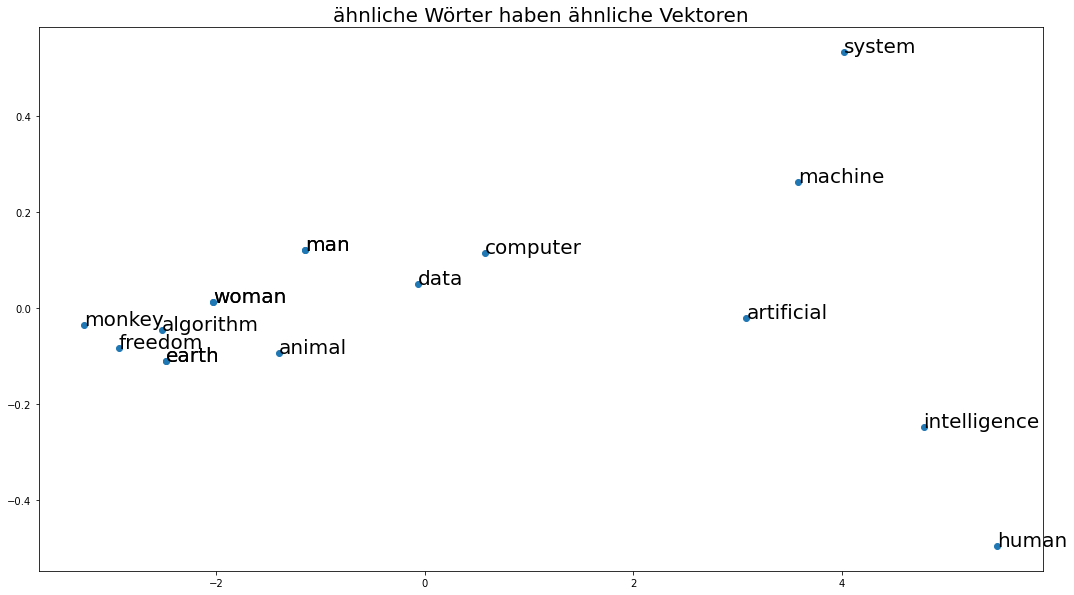

In [18]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

%matplotlib inline
plt.rcParams["figure.figsize"] = (18, 10)

def plot_words(*words, lines=False):
    pca = PCA(n_components=2)
    xys = pca.fit_transform([model.wv[w] for w in words])

    if lines:
        for i in range(0, len(words), 2):
            plt.plot(xys[i:i+2, 0], xys[i:i+2, 1])
    else:
        plt.scatter(*xys.T)

    for word, xy in zip(words, xys):
        plt.annotate(word, xy, fontsize=20)

    return pca

plt.title('ähnliche Wörter haben ähnliche Vektoren', fontsize=20)

plot_words('earth', 'intelligence', 'human', 'computer', 'algorithm', 'animal',
           'monkey', 'data', 'man', 'woman', 'man', 'woman', 'artificial',
           'system', 'earth', 'freedom', 'machine')

#plot_words('earth', 'intelligence', 'human', 'mountain', 'computer', 'algorithm', 'animal',
#           'monkey', 'data', 'man', 'woman', 'man', 'woman', 'artificial',
#           'system', 'earth', 'freedom', lines=True)

more examples...: https://x.st/fooling-around-with-word-embeddings/